> Kaggle_Titanic
- https://www.kaggle.com/c/titanic

> The competition is : 
- 기계 학습을 사용하여 타이타닉 난파선에서 살아남은 승객을 예측하는 모델을 만들어라.
- "어떤 종류의 사람들이 생존할 가능성이 더 높았습니까?"라는 질문에 답하는 예측 모델을 구축하도록 요청.
- 승객 데이터(예: 이름, 나이, 성별, 사회경제적 계층 등) 사용.

> Data
    - Passengerid : Id(탑승자 데이터 일련번호)
    - survival : 생존여부, 0 = No, 1 = Yes
    - pclass : Ticket class(티켓 선실 등급), 1 = 1st, 2 = 2nd, 3 = 3rd
    - sex : Sex(성별)
    - name : name(이름)
    - Age :	Age in years(나이)	
    - sibsp	: # of siblings / spouses aboard the Titanic(같이 탑승한 형제자매 또는 배우자 인원수)	
    - parch : # of parents / children aboard the Titanic(같이 탑승한 부모님 또는 어린이 인원수)	
    - ticket : Ticket number(티켓 번호)
    - fare : Passenger fare(요금)
    - cabin : Cabin number(선실번호)
    - embarked : Port of Embarkation(중간 정착 항구), C = Cherbourg, Q = Queenstown, S = Southampton

# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check Data

## check

In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# object는 string으로 봐도 무방
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## NaN

- Age : 평균나이로 채움
- Cabin : 'N' 삽입
- Embarked : 'N' 삽입

In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print("총 Null 값 수 : ", titanic_df.isnull().sum().sum())

총 Null 값 수 :  0


## Features

In [8]:
columns = titanic_df.columns
categorical = []
numerical = []

for c in columns:
    if titanic_df[c].dtype == 'object':
        categorical.append(c)
    else :
        numerical.append(c)
        
print("categorical : ", categorical)
print("numerical : ", numerical)

categorical :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical :  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### categorical features

In [9]:
print("Categorical Features : ", categorical)

Categorical Features :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


#### value_counts

In [10]:
# 이름, 티켓은 모아서 셀 수 없으니 우선 빼고 생각
for cf in categorical:
    if cf != "Name" and cf != "Ticket":
        print('\n', cf, '값 분포 :\n', titanic_df[cf].value_counts())


 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
D50              1
B94              1
E58              1
F38              1
D56              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [11]:
# Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임
# 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높지 않았을까??

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [12]:
# 다시 value_counts 실행
for cf in categorical:
    if cf != "Name" and cf != "Ticket":
        print('\n', cf, '값 분포 :\n', titanic_df[cf].value_counts())


 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


#### relation with dependent feature
> Survived :
- 0 : 사망
- 1 : 생존

> Sex, Age, PClass
- 중요하게 생존을 좌우하는 피처임을 어느정도 확인할 수 있다

In [13]:
# Sex
# 여정과 아이들, 노약자 -> 부자, 유명인 -> 가난한 이들 순서로 구조되었을 것
print(titanic_df.groupby(['Sex', 'Survived'])['Survived'].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


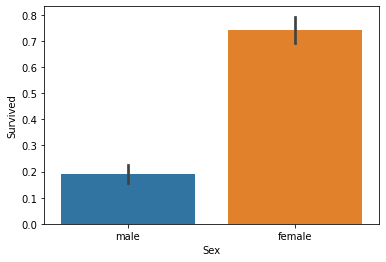

In [14]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)
plt.show()

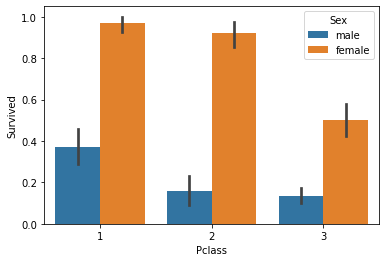

In [15]:
# 객실 등급 추가 (부자와 가난한 사람 비교)
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)
plt.show()

In [16]:
# Age
# age 범위에 따른 카테고리 값 할당
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [17]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age', 'Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


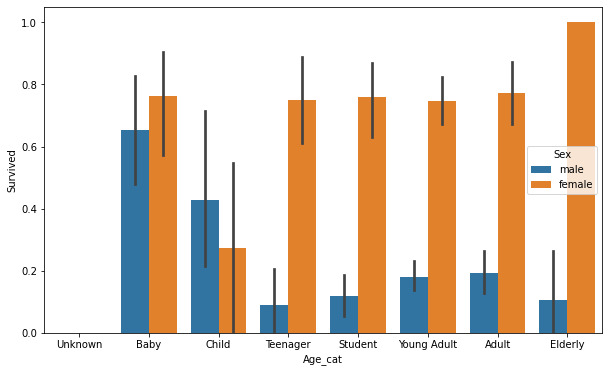

In [18]:
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
plt.figure(figsize = (10,6))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)

# Scikit-Learn

## preprocessing

In [19]:
columns = titanic_df.columns
categorical = []
numerical = []

for c in columns:
    if titanic_df[c].dtype == 'object':
        categorical.append(c)
    else :
        numerical.append(c)
        
print("categorical : ", categorical)
print("numerical : ", numerical)

categorical :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical :  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [20]:
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'],axis=1, inplace=True)
    return df
    
# Null처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# LabelEncoding 수행 함수
# categorical -> numerical
from sklearn.preprocessing import LabelEncoder

def format_features(df):
    for feature in ['Sex', 'Cabin', 'Embarked']:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = drop_features(df)
    df = fillna(df)
    df = format_features(df)
    return df

## seperating
- 피처 데이터 세트와 레이블 데이터 세트로 분리

In [21]:
# 원본 데이터 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

## ML
> ML Algorithm
- 결정 트리 (DecisionTreeClassifier)
- 랜덤 포레스트 (RandomForestClassifier)
- 로지스틱 회귀 (LogisticRegression) : 분류 알고리즘 (이름은 회귀지만)

> 예측성능평가
- acrruracy_score() 사용

### test data set (검증)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size = 0.2)

### predict

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7542
RandomForestClassifier 정확도 : 0.7877
LogisticRegression 정확도 : 0.7374


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 교차검증
> model_selection package
- KFold class
- cross_val_score()
- GridSearchCV class

#### KFold

In [24]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    # 폴드 세트를 5개인 KFold 객체 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    # Kfold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.7598
교차 검증 1 정확도 : 0.7697
교차 검증 2 정확도 : 0.8146
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.8090
평균 정확도 : 0.7857


#### cross_val_score()
- StratifiedKFold를 이용해 폴드 세트를 분할하기 때문에 KFold의 정확도와 다름.

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7697
교차 검증 2 정확도 : 0.8146
교차 검증 3 정확도 : 0.7640
교차 검증 4 정확도 : 0.7921
평균 정확도 : 0.7767


#### GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
             'min_samples_split':[2,3,5], 
             'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
GridSearchCV 최고 정확도 : 0.8301
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8045


# 평가

## 정확도
- 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님.

### ex1
- 단순히 성별로만 판단했는데 정확도가 꽤 높게 나옴

In [27]:
from sklearn.base import BaseEstimator

# 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 classifier
class MyDummyClassifier(BaseEstimator):
    # fit()메서드는 아무것도 학습하지 않음
    def fit(self, X, y = None):
        pass
    
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는 : 0.7877


### ex2
- 불균형한 데이터 세트에서 아무것도 하지 않고 무족너 특정한 결과로 찍어도 높은 수치가 나옴. (정확도의 문제점)

In [29]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0 값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [30]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)

fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900


## 오차 행렬
> 정확도  :
- (TN + TP) / (TN + FP + FN + TP)
- 예측 결과와 실제 값이 동일한 건수/전체 데이터 수

In [31]:
# 무조건 Negative로 예측, 실제 Negative : 405, 실제 True : 45
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## 정밀도와 재현율

### 정밀도, 재현율
> 정밀도
- TP / (FP + TP)
- 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
- 양성 예측도
- 중요 지표인 경우 : 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

> 재현율
- TP / (FN + TP)
- 실제 값이 Positive인 대상 중에 예측과 실제 값이 positive로 일치한 데이터의 비율
- 민감도(Sensitivity) 또는 TPR(True Positive Rate)
- 중요 지표인 경우 : 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터 / 테스트 데이터 분할
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[106  12]
 [ 13  48]]
정확도 : 0.8603, 정밀도 : 0.8000, 재현율 : 0.7869


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 정밀도/재현율 트레이드오프

#### predict_proba()
- 반환되는 ndarray는 첫 번째 칼럼이 클래스 값 0에 대한 예측 확률, 두 번째 칼럼이 클래스 값 1에 대한 예측 확률

In [34]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n :', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
 : [[0.49823049 0.50176951]
 [0.87000696 0.12999304]
 [0.85942673 0.14057327]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.49823049 0.50176951 1.        ]
 [0.87000696 0.12999304 0.        ]
 [0.85942673 0.14057327 0.        ]]


#### Binarizer class

In [35]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold 값보다 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [36]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[106  12]
 [ 13  48]]
정확도 : 0.8603, 정밀도 : 0.8000, 재현율 : 0.7869


In [37]:
# Binarizer의  threshold 설정값을  0.4로 설정. 즉 분류 결정 임겟값을 0.5에서 0.4로 낮춤
# 임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어졌음
custom_threshold = 0.4

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [12 49]]
정확도 : 0.8156, 정밀도 : 0.7000, 재현율 : 0.8033


In [38]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list객체 내의 값을 차례로 iteration 하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print('\n')
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

# 재현율을 향상시키면서 다른 수치를 어느 정도 감소하는 희생을 해야한다면 임곗값 0.45가 가장 적당해 보임

임곗값 :  0.4
오차 행렬
[[97 21]
 [12 49]]
정확도 : 0.8156, 정밀도 : 0.7000, 재현율 : 0.8033


임곗값 :  0.45
오차 행렬
[[103  15]
 [ 13  48]]
정확도 : 0.8436, 정밀도 : 0.7619, 재현율 : 0.7869


임곗값 :  0.5
오차 행렬
[[106  12]
 [ 13  48]]
정확도 : 0.8603, 정밀도 : 0.8000, 재현율 : 0.7869


임곗값 :  0.55
오차 행렬
[[110   8]
 [ 15  46]]
정확도 : 0.8715, 정밀도 : 0.8519, 재현율 : 0.7541


임곗값 :  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213




#### precision_recall_curve()

In [39]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape : ', thresholds.shape)

# 반환된 임계값 배열 로우가 147건 이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임곗값 : ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape :  (142,)
샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값 :  [0.11 0.13 0.15 0.2  0.29 0.41 0.56 0.67 0.82 0.93]
샘플 임계값별 정밀도 :  [0.391 0.451 0.47  0.539 0.643 0.71  0.852 0.947 0.957 1.   ]
샘플 임계값별 재현율 :  [1.    0.984 0.902 0.902 0.885 0.803 0.754 0.59  0.361 0.131]


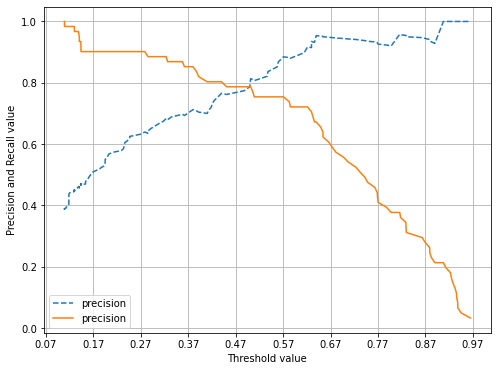

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'precision')
    
    # threshold 값 x축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

## F1 Score
- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

In [43]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'.format(f1))

F1 스코어 : 0.7934


In [45]:
# 임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    #F1 score 추가
    f1 = f1_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값 :  0.4
오차 행렬
[[97 21]
 [12 49]]
정확도 : 0.8156, 정밀도 : 0.7000, 재현율 : 0.8033, F1 : 0.7481


임곗값 :  0.45
오차 행렬
[[103  15]
 [ 13  48]]
정확도 : 0.8436, 정밀도 : 0.7619, 재현율 : 0.7869, F1 : 0.7742


임곗값 :  0.5
오차 행렬
[[106  12]
 [ 13  48]]
정확도 : 0.8603, 정밀도 : 0.8000, 재현율 : 0.7869, F1 : 0.7934


임곗값 :  0.55
오차 행렬
[[110   8]
 [ 15  46]]
정확도 : 0.8715, 정밀도 : 0.8519, 재현율 : 0.7541, F1 : 0.8000


임곗값 :  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213, F1 : 0.8000




## ROC 곡선과 AUC
- ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표

> ROC 곡선
- Receiver Operation Characteristic Curve : 수진자 판단 곡선
- FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선


> TPR : 
- True Positive Rate, 재현율, 민감도
- 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냄
- (질병이 있는 사람은 질병이 있는 것으로 양성 판정)

> TNR : 
- True Negative Rate, 특이성(Specificity)
- 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타냄
- (질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)

### roc_curve()

In [48]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26 31 36 41]
샘플 index로 추출한 임곗값 :  [0.96 0.64 0.59 0.44 0.33 0.23 0.14 0.14 0.12]
샘플 임곗값별 FPR :  [0.    0.017 0.051 0.127 0.212 0.331 0.542 0.585 0.72 ]
샘플 임곗값별 TPR :  [0.033 0.672 0.721 0.803 0.869 0.902 0.918 0.967 0.984]


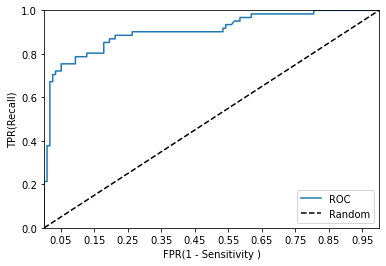

In [50]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = "ROC")
    
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1) ; plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity )'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

### AUC
> AUC(Area Under Curve) :
- ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울수록 좋은 수치

In [53]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9059


In [56]:
# ROC AUC 값을 측정하는 로직 추가

def get_clf_eval(y_test, pred=None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROc-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))